In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def act(s, a):
  global data
  row, col = s
  if a == 0:
    rowp, colp = row - 1, col
  elif a == 1:
    rowp, colp = row, col + 1
  elif a == 2:
    rowp, colp = row + 1, col
  elif a == 3:
    rowp, colp = row, col - 1

  if (0 <= rowp < data.shape[0] and 0 <= colp < data.shape[1] and data[rowp, colp] >= 0):
    sp = (rowp, colp)
    reward = data[rowp, colp]
    return (sp, reward)
  else:
    return (s, 0)

In [8]:
## 1-(a)

def eql(gamma = 0.9, nep = 1000, niter = 300):
  global data
  nrow, ncol = data.shape
  Q = np.zeros((nrow, ncol, 4))
  Qbar = np.zeros(nep)
  valid = []
  for i in range(nrow):
    for j in range(ncol):
      if data[i, j] >= 0:
        valid.append((i, j))

  for e in range(nep):
    s = valid[np.random.choice(len(valid))]
    for j in range(niter):
        a = np.random.choice(4)
        sp, r = act(s, a)
        Q[s[0], s[1], a] = r + gamma * np.max(Q[sp[0], sp[1], :])
        s = sp
    Qsum = 0
    count = 0
    for i, j in valid:
      for a in range(4):
        Qsum += Q[i, j, a]
        count += 1
    Qbar[e] = Qsum / count if count > 0 else 0
  return Q, Qbar

data = pd.read_csv('/content/gdrive/MyDrive/Data/map_24x32.csv', header = None).values
Q, Qbar = eql()

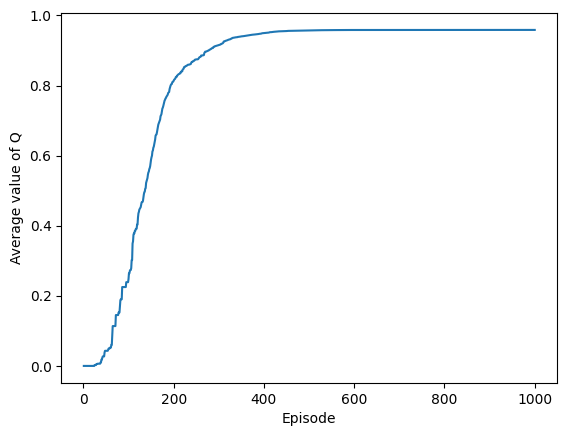

In [9]:
plt.plot(range(1, len(Qbar) + 1), Qbar)
plt.xlabel('Episode')
plt.ylabel('Average value of Q')
plt.show()

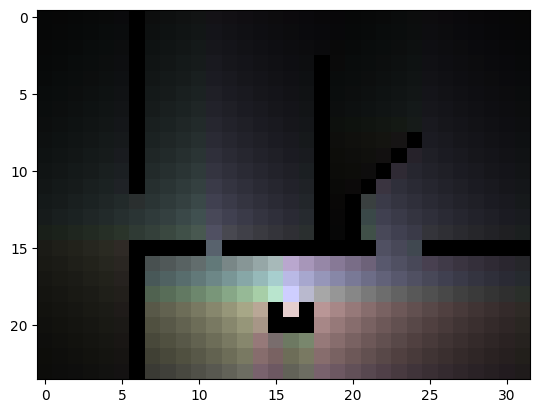

In [10]:
## 1-(b)

qmap = np.zeros((data.shape[0], data.shape[1], 3))
qmap[:, :, 0] = Q[:, :, 0]
qmap[:, :, 1] = Q[:, :, 1]
qmap[:, :, 2] = Q[:, :, 2]

maxq = np.max(qmap)
qmap = qmap / maxq

plt.imshow(qmap)
plt.show()

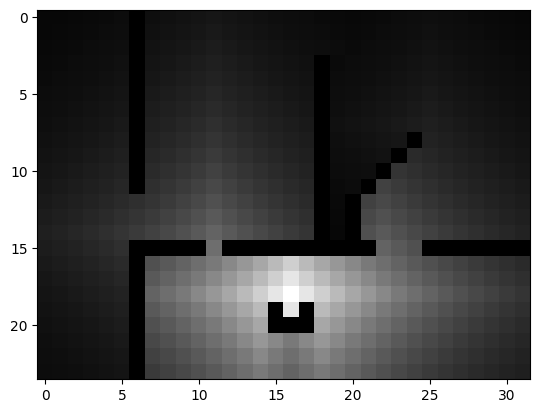

In [11]:
## 1-(c)
plt.imshow(np.max(Q, axis = 2), cmap = 'gray')
plt.show()

In [12]:
## 1-(d)

pol = np.argmax(Q, axis = 2)
nrow, ncol = data.shape
tbl = np.full((nrow, ncol), ' ', dtype = object)
for i in range(nrow):
  for j in range(ncol):
    if data[i, j] >= 0:
      if pol[i, j] == 0:
        tbl[i, j] = 'U'
      elif pol[i, j] == 1:
        tbl[i, j] = 'R'
      elif pol[i, j] == 2:
        tbl[i, j] = 'D'
      elif pol[i, j] == 3:
        tbl[i, j] = 'L'
    else:
      tbl[i, j] = '#'
for r in tbl:
  print(''.join(r))

RRRRRD#RRRRDDDDDDDDDRRRDRDDDDDDL
RRRRRD#RRRRDDDDDDDDDRRRRRDDDDDDD
RRRRRD#RRRRDDDDDDDLLRRRRRDDDDDDD
RRRRRD#RRRRDDDDDDD#DDRRDRDDDDDDD
RRRRRD#RRRRDDDDDDD#RDRDDRDDDDDDD
RRRRRD#RRRRDDDDDDD#RRRRRRDDDDDDD
RRRRRD#DRRDDDDDDDD#RRRRRRDDDDDDD
RRRRRD#RDRDDDDDDDL#RRRRRRDDDDDDD
RRRRRD#RRDRDDDDDDL#UUURU#DDDDDDD
RRRRRD#RRDDDDDDDLD#UUUU#DDDDDDDD
RRRRRD#RRRRDDDLLDD#UUU#DDDDDDDDD
RRRDRD#RRRRDDDLDDD#UU#DDDDDDDDDD
RRRRRRDDRRRDDDDLDL#U#RDDDDDDDDDD
RRRRRRRRDRRDDDDLDD#U#RDDDDDDDDDD
RRRRRRRRRRRDLLLLLL#U#RDDLLLLLLLL
UUUUUU#####D##########DDL#######
UUUUUU#RRRRRRRRRDLLDDDDLLDDDDDLL
UUUUUU#RRRRRRRRRDLDDDDLLLLLLLLLL
UUUUUU#RRRRRRRRRDLLLLLLLLLLLLLLL
UUUUUU#RRUUUUUU#U#UUULLLLLLUUUUU
UUUUUU#RUUUUUUU###UUULLLLLLLLUUU
UUUUUU#UUUUUUUULRRUUUULLULLULLLL
UUUUUU#URUUUUUUUUUUUUULUUUUUUUUU
UUUUUU#URUUUUUUUURULUUUUUUUUUUUU
